In [1]:
refSeq = {}
refSeqFile = open('/qbio/prom317/tutorial/references/GRCm39.transcripts.fa.cut', 'r')
lines = refSeqFile.readlines()
transcriptId=""
for line in lines:
    if line.startswith(">"):
        transcriptId = line[1:-1]
        refSeq[transcriptId] = ""
    else:
        refSeq[transcriptId] += line[:-1]

In [2]:
samData={}
samFile = open('/qbio/prom317/tutorial/transCutAlignment/CLIP_35L33G/Aligned.out.sam', 'r')
lines = samFile.readlines()
for line in lines:
    if line.startswith("SRR"):
        linesep = line.split("\t")
        queryName = linesep[0]
        refSeqName = linesep[2]
        pos = int(linesep[3])
        cigar = linesep[5]
        querySeq = linesep[9]
        samData[queryName] = [refSeqName, pos, cigar, querySeq]

In [13]:
import re
for i in samData.keys():
    cigarList=[]
    cigar = samData[i][2]
    while(cigar):
        matchCigar = re.match("[0-9]+[A-Z]+", cigar)
        cigarList.append(matchCigar.group())
        cigar = re.sub(pattern = matchCigar.group(), repl = "", count = 1, string = cigar)
    samData[i][2] = cigarList

In [28]:
deletionData = []
for i in samData.keys():
    samLine = samData[i]
    refPos = samLine[1]
    refSequence = refSeq[samLine[0]]
    querySequence = samLine[3]
    cigar = samLine[2]
    queryCount = 0
    dataList = []
    for string in cigar:
        if string[-1:] == "M" or string[-1:] == "S" or string[-1:] == "I":
            num = int(string[:-1])
            for j in range(num):
                queryCount +=1
        elif string[-1:] == "D":
            num = int(string[:-1])
            for j in range(num):
                deletionData.append((((queryCount/len(querySequence))*20),len(querySequence)))

In [29]:
import math
deletionCount = []
for i in range(20):
    deletionCount.append(0)
for i in deletionData:
    idx = math.floor(i[0])
    deletionCount[idx] = deletionCount[idx]+(1/i[1])
for i in range(len(deletionCount)):
    deletionCount[i] = (deletionCount[i]/len(samData))*100

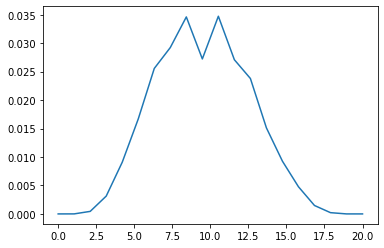

In [30]:
import numpy as np
import matplotlib.pyplot as plt
x_values = np.linspace(0,20,20)
y_values = deletionCount
plt.plot(x_values, y_values)
plt.show()

In [24]:
insertionData = []
for i in samData.keys():
    samLine = samData[i]
    refPos = samLine[1]
    refSequence = refSeq[samLine[0]]
    querySequence = samLine[3]
    cigar = samLine[2]
    queryCount = 0
    dataList = []
    for string in cigar:
        if string[-1:] == "M" or string[-1:] == "S":
            num = int(string[:-1])
            for j in range(num):
                queryCount +=1
        elif string[-1:] == "I":
            num = int(string[:-1])
            for j in range(num):
                queryCount +=1
                insertionData.append((((queryCount/len(querySequence))*20),len(querySequence)))
insertionCount = []
for i in range(20):
    insertionCount.append(0)
for i in insertionData:
    idx = math.floor(i[0])
    insertionCount[idx] = insertionCount[idx] + (1/i[1])
for i in range(len(insertionCount)):
    insertionCount[i] = (insertionCount[i]/len(samData))*100

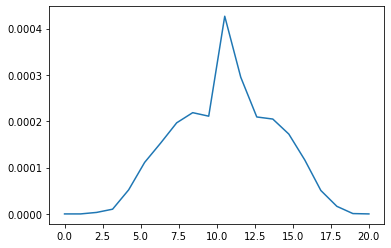

In [25]:
y_values2 = insertionCount
plt.plot(x_values,y_values2)
plt.show()

In [4]:
import pysam
pysamData = pysam.AlignmentFile('/qbio/prom317/tutorial/transCutAlignment/CLIP_35L33G_MD/Aligned.out.sorted.bam', 'rb')
iter = pysamData.fetch("ENSMUST00000083506.3", 50, 60)
for x in iter:
    if x.query_name == "SRR458758.2.8708628":
        print(str(x.get_aligned_pairs(with_seq = True)))

[(0, 33, 'G'), (1, 34, 'T'), (2, 35, 'C'), (3, 36, 'T'), (4, 37, 'A'), (5, 38, 'T'), (6, 39, 'G'), (7, 40, 'A'), (8, 41, 'T'), (9, 42, 'A'), (10, 43, 'C'), (11, 44, 'C'), (12, 45, 'A'), (13, 46, 'C'), (14, 47, 'C'), (15, 48, 'C'), (16, 49, 'G'), (17, 50, 'G'), (18, 51, 'T'), (19, 52, 'A'), (20, 53, 'C'), (21, 54, 'A'), (22, 55, 'g'), (23, 56, 'G'), (24, 57, 'A'), (25, 58, 'G'), (26, 59, 'A'), (27, 60, 'T'), (28, 61, 'A'), (29, 62, 'A'), (30, 63, 'C'), (31, 64, 'T'), (32, 65, 'G'), (33, 66, 'T'), (34, 67, 'A'), (35, 68, 'C'), (36, 69, 'A'), (37, 70, 'G'), (38, 71, 'G'), (39, 72, 'C'), (40, 73, 'C'), (41, 74, 'A'), (42, 75, 'C'), (43, 76, 'T'), (44, 77, 'G'), (45, 78, 'C'), (46, 79, 'C'), (47, 80, 'T'), (48, 81, 'T'), (49, 82, 'G'), (50, 83, 'C')]


In [20]:
def pysamSubCount(pysamFile : pysam.AlignedSegment):
    pairs = pysamFile.get_aligned_pairs(with_seq = True)
    queryLen = pairs[len(pairs)-1][0]
    subList = []
    for pair in pairs:
        if pair[2] in ["a", "t", "g", "c"]:
            subList.append((pair[0]/queryLen)*20)
    return subList, queryLen
iter = pysamData.fetch("ENSMUST00000076258.13")
for x in iter:
    if x.query_name == "SRR458758.2.170960":
        print(pysamSubCount(x))

([10.169491525423728, 10.508474576271187, 10.847457627118644, 11.52542372881356, 11.864406779661017, 12.203389830508476, 12.542372881355933], 59)


In [21]:
substitutionCount = []
for i in range(20):
    substitutionCount.append(0)
for transcript_ID in refSeq.keys():
    iter = pysamData.fetch(transcript_ID)
    for segment in iter:
        subList = pysamSubCount(segment)
        for num in subList[0]:
            idx = math.floor(num)
            substitutionCount[idx] = substitutionCount[idx] +(20/subList[1])
for i in range(len(substitutionCount)):
    substitutionCount[i] = (substitutionCount[i]/len(samData))*100

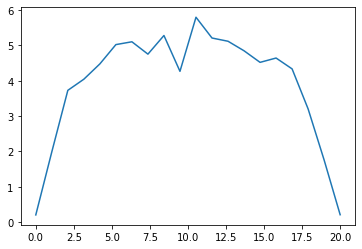

In [22]:
import matplotlib.pyplot as plt
y_values3 = substitutionCount
plt.plot(x_values,y_values3)
plt.show()

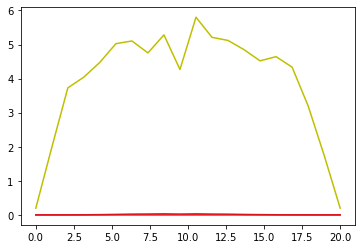

In [31]:
plt.plot(x_values, y_values, x_values, y_values2, 'r-', x_values, y_values3, 'y-')
plt.show()